## EDA and Feature Engineering

**Problem Statement**

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

plt.style.use('fivethirtyeight')

In [4]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# EDA

In [6]:
train_df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [7]:
test_df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [11]:
def divider():
    print("*-----------------------------------*")

In [16]:
divider()
print("Features Information")
print(f"[INFO] Train Dataframe have {len(list(train_df.select_dtypes(['category', 'object'])))} Texual Columns.")
print(f"[INFO] Test Dataframe have {len(list(test_df.select_dtypes(['category', 'object'])))} Texual Columns.")
print(f"[INFO] Test Dataframe have {len(list(test_df.select_dtypes(['int', 'float'])))} Numerical Columns.")
print(f"[INFO] Train Dataframe have {len(list(train_df.select_dtypes(['int', 'float'])))} Numerical Columns.")

*-----------------------------------*
Features Information
[INFO] Train Dataframe have 5 Texual Columns.
[INFO] Test Dataframe have 5 Texual Columns.
[INFO] Test Dataframe have 6 Numerical Columns.
[INFO] Train Dataframe have 7 Numerical Columns.


In [18]:
train_df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [20]:
test_df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
dtype: object

In [24]:
train_df.shape

(550068, 12)

In [23]:
train_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [30]:
train_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [31]:
test_df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [154]:
# Merging two Dataframes (train and test)
final_df = train_df.append(test_df)

/tmp/ipykernel_5241/3807193765.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = train_df.append(test_df)


In [155]:
final_df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [156]:
final_df.shape

(783667, 12)

In [157]:
final_df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

<AxesSubplot:>

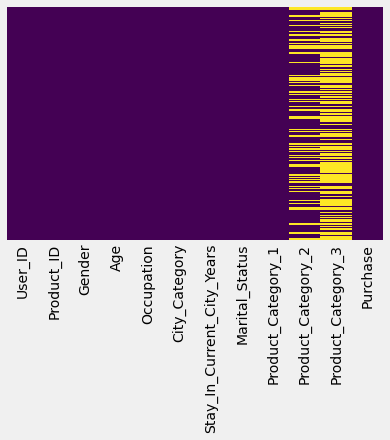

In [158]:
# Train DF
sns.heatmap(train_df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

<AxesSubplot:>

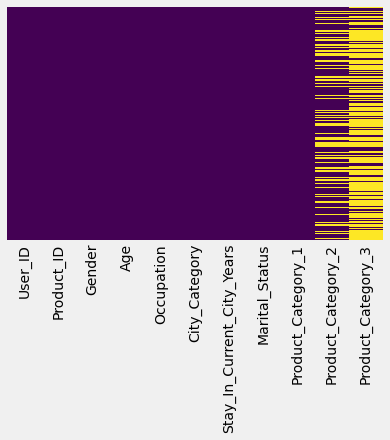

In [159]:
# Test DF
sns.heatmap(test_df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [160]:
final_df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0


In [161]:
final_df = final_df.drop('User_ID', axis=1)

In [162]:
final_df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0


In [163]:
final_df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [164]:
final_df.nunique()

Product_ID                     3677
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

Text(0.5, 1.0, 'No of Purcahses by Age')

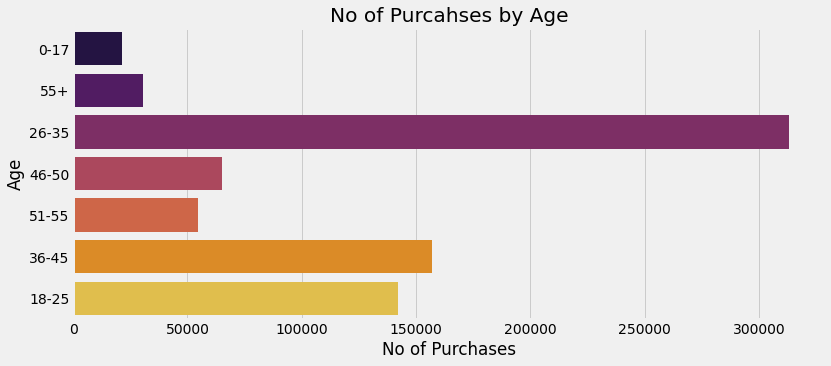

In [165]:
plt.figure(figsize=(12, 5))
sns.countplot(y='Age', data=final_df, palette="inferno")
plt.xlabel("No of Purchases")
plt.title("No of Purcahses by Age")

In [166]:
# Observation
# Mostly Purchases is done by people of age group 26-35.

In [167]:
final_df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

Text(0.5, 1.0, 'No of Purcahses by Gender')

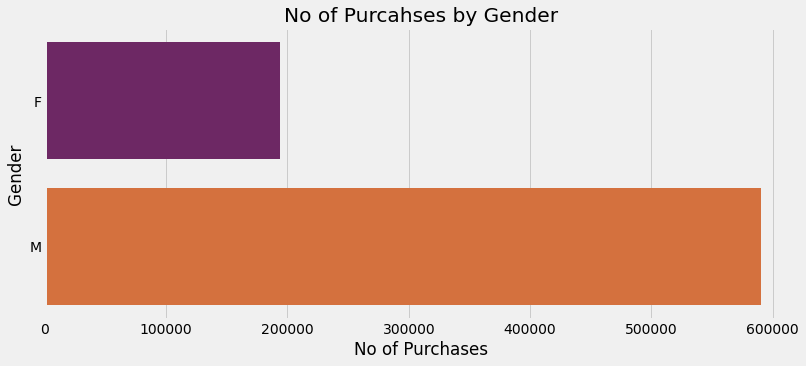

In [168]:
plt.figure(figsize=(12, 5))
sns.countplot(y='Gender', data=final_df, palette="inferno")
plt.xlabel("No of Purchases")
plt.title("No of Purcahses by Gender")

In [169]:
# Observation
# Mostly Purchases is done by Males.

# Feature Engineering

In [170]:
# Gender
# F == 0
# M == 1
final_df['Gender'] = list(map(lambda x: 0 if x == 'F' else 1, final_df['Gender'].values))
df['Gender'].unique()

array([0, 1])

In [171]:
final_df['City_Category'].unique()
df = final_df.copy()

In [172]:
# City Category
# A == 1
# B == 2
# C == 3
final_df['City_Category'] = final_df['City_Category'].map({'A': 1, 'B': 2, 'C': 3})
final_df['City_Category'].unique()

array([1, 3, 2])

In [173]:
final_df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,1,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,1,2,0,1,6.0,14.0,15200.0


In [174]:
# Age
# '0-17' == 1
# '18-25' == 2
# '26-35' == 3
# '36-45' == 4
# '46-50' == 5
# '51-55' == 6
# '55+' == 7
final_df['Age'] = final_df['Age'].map({'0-17': 1, '18-25': 2, '26-35': 3, '36-45': 4, '46-50': 5, '51-55': 6, '55+': 7})
final_df['Age'].unique()

array([1, 7, 3, 5, 6, 4, 2])

In [175]:
final_df.sample(5)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
61650,P00079742,1,6,0,3,2,1,1,2.0,15.0,15811.0
96173,P00003442,0,4,20,3,3,1,4,5.0,8.0,NaN
14106,P00004542,1,5,20,3,1,0,5,8.0,NaN,NaN
493227,P00346842,1,2,4,2,4+,0,11,NaN,NaN,1652.0
20915,P00015542,1,3,4,1,4+,0,1,2.0,13.0,4314.0


In [176]:
final_df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [177]:
divider()
print(f"Dataset have total {final_df[['Product_Category_2', 'Product_Category_1']].isnull().sum().sum()} Null Values.")

*-----------------------------------*
Dataset have total 245982 Null Values.


In [178]:
# Focus on replcing Missing Values
final_df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [199]:
# Best way is to replace missing values with mode
# Because these are discrete values so we can mod in continous some other ways
# are
# The mode is the value that appears most frequently in a data set. 

In [180]:
final_df['Product_Category_2'].value_counts()

8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: Product_Category_2, dtype: int64

In [181]:
final_df['Product_Category_2'].mode()

0    8.0
Name: Product_Category_2, dtype: float64

In [182]:
final_df['Product_Category_2'] = final_df['Product_Category_2'].fillna(final_df['Product_Category_2'].mode()[0])

In [183]:
final_df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [184]:
final_df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [185]:
final_df['Product_Category_3'] = final_df['Product_Category_3'].fillna(final_df['Product_Category_3'].mode()[0])

In [186]:
final_df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [192]:
final_df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [193]:
final_df['Stay_In_Current_City_Years'] = final_df['Stay_In_Current_City_Years'].str.replace("+", "")

/tmp/ipykernel_5241/580416254.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  final_df['Stay_In_Current_City_Years'] = final_df['Stay_In_Current_City_Years'].str.replace("+", "")


In [194]:
final_df['Stay_In_Current_City_Years'].unique()

array(['2', '4', '3', '1', '0'], dtype=object)

In [197]:
final_df['Stay_In_Current_City_Years'] = final_df['Stay_In_Current_City_Years'].astype('int')

In [198]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  float64
 9   Product_Category_3          783667 non-null  float64
 10  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(7), object(1)
memory usage: 71.7+ MB


In [200]:
final_df['Product_Category_2'] = final_df['Product_Category_2'].astype('int')
final_df['Product_Category_3'] = final_df['Product_Category_3'].astype('int')
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   City_Category               783667 non-null  int64  
 5   Stay_In_Current_City_Years  783667 non-null  int64  
 6   Marital_Status              783667 non-null  int64  
 7   Product_Category_1          783667 non-null  int64  
 8   Product_Category_2          783667 non-null  int64  
 9   Product_Category_3          783667 non-null  int64  
 10  Purchase                    550068 non-null  float64
dtypes: float64(1), int64(9), object(1)
memory usage: 71.7+ MB


In [201]:
final_df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,1,2,0,3,8,16,8370.0
1,P00248942,0,1,10,1,2,0,1,6,14,15200.0
2,P00087842,0,1,10,1,2,0,12,8,16,1422.0
3,P00085442,0,1,10,1,2,0,12,14,16,1057.0
4,P00285442,1,7,16,3,4,0,8,8,16,7969.0


Text(0.5, 1.0, 'No of Purcahses by Age')

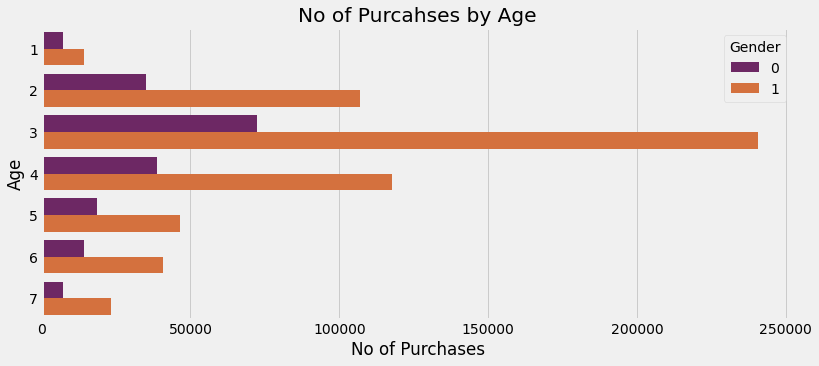

In [205]:
plt.figure(figsize=(12, 5))
sns.countplot(y='Age', data=final_df, hue="Gender", palette="inferno")
plt.xlabel("No of Purchases")
plt.title("No of Purcahses by Age")

<AxesSubplot:xlabel='Age', ylabel='Purchase'>

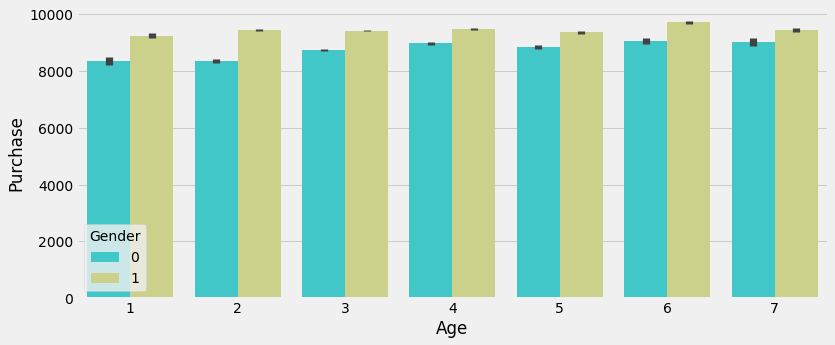

In [206]:
plt.figure(figsize=(12, 5))
sns.barplot(x='Age', y='Purchase', hue='Gender', data=final_df, palette="rainbow")

In [207]:
# Observation
# Man of every age group has more purchases than woman.

<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

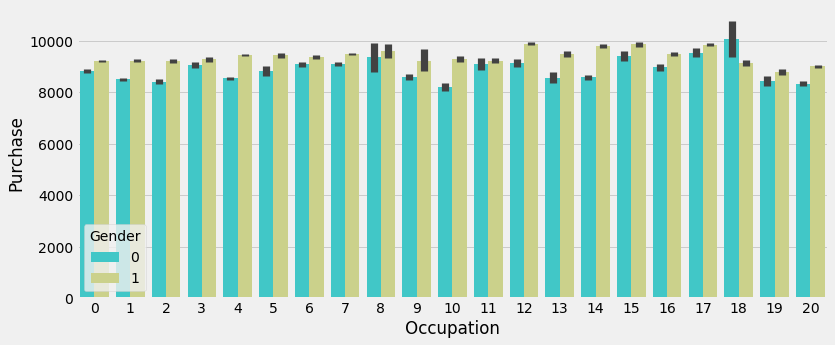

In [208]:
# Purchase vs Ocupation

plt.figure(figsize=(12, 5))
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=final_df, palette="rainbow")

<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

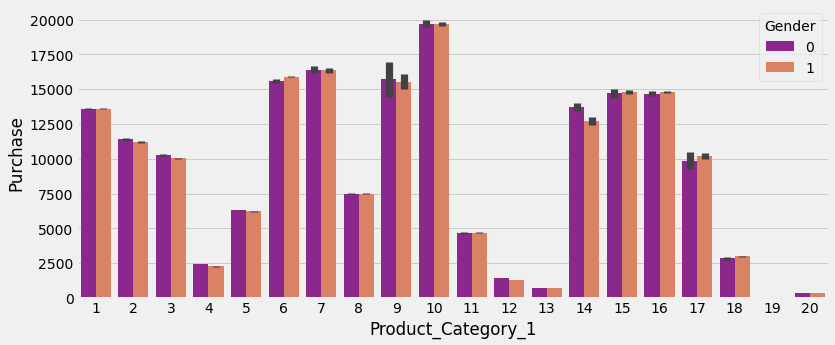

In [212]:
# Product_Category vs Purchase

plt.figure(figsize=(12, 5))
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=final_df, palette="plasma")

<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

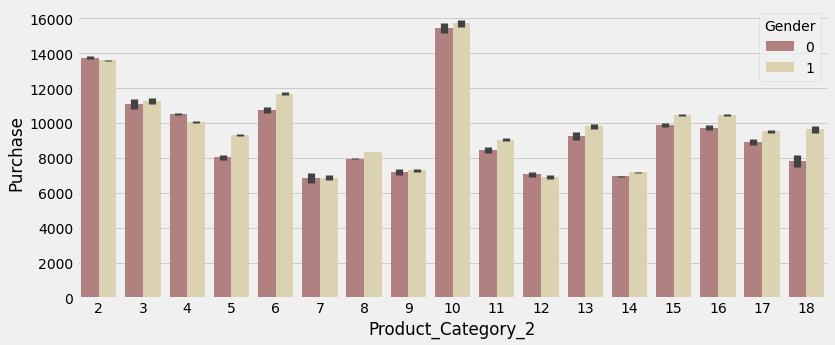

In [213]:
# Product_Category vs Purchase

plt.figure(figsize=(12, 5))
sns.barplot(x='Product_Category_2', y='Purchase', hue='Gender', data=final_df, palette="pink")

<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

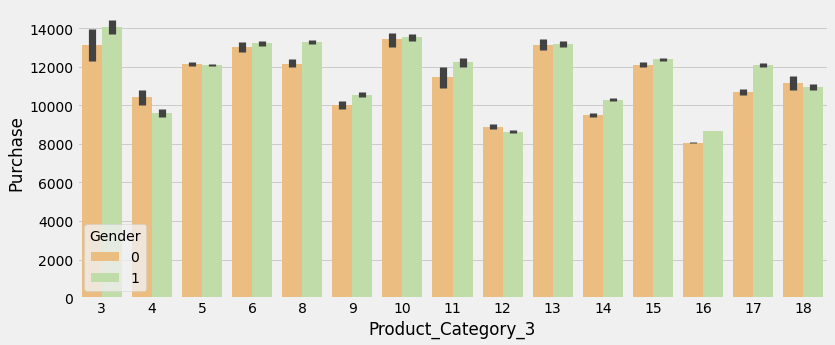

In [215]:
# Product_Category vs Purchase

plt.figure(figsize=(12, 5))
sns.barplot(x='Product_Category_3', y='Purchase', hue='Gender', data=final_df, palette="Spectral")

In [216]:
# Observation
# Product category one has more purchases than remainings two.

In [219]:
final_df = final_df.drop('Product_ID', axis=1)
final_df.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,1,2,0,3,8,16,8370.0
1,0,1,10,1,2,0,1,6,14,15200.0
2,0,1,10,1,2,0,12,8,16,1422.0
3,0,1,10,1,2,0,12,14,16,1057.0
4,1,7,16,3,4,0,8,8,16,7969.0


# Features Scaling

In [231]:
final_df['Purchase'].isnull().sum()

233599

In [272]:
df_test = final_df[final_df['Purchase'].isnull()]

In [273]:
# df_test.drop('Purchase', axis=1, inplace=True)
df_test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,5,7,2,2,1,1,11,16,NaN
1,1,3,17,3,0,0,3,5,16,NaN
2,0,4,1,2,4,1,5,14,16,NaN
3,0,4,1,2,4,1,4,9,16,NaN
4,0,3,1,3,1,0,4,5,12,NaN


In [274]:
df_train = final_df[~final_df['Purchase'].isnull()]

In [276]:
df_train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,1,2,0,3,8,16,8370.0
1,0,1,10,1,2,0,1,6,14,15200.0
2,0,1,10,1,2,0,12,8,16,1422.0
3,0,1,10,1,2,0,12,14,16,1057.0
4,1,7,16,3,4,0,8,8,16,7969.0


In [277]:
df_train.shape

(550068, 10)

In [271]:
df_test.shape

(233599, 10)


StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation.

## Standard Deviation
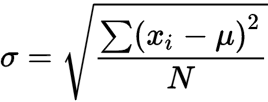

In [ ]:
df_train.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [279]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [280]:
X = df_train.iloc[:, :-1]
Y = df_train.iloc[:,-1]
X, Y = shuffle(X, Y)

In [281]:
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
261555,1,4,16,1,0,0,5,8,16
268593,1,1,0,3,1,0,1,5,15
120410,0,7,6,3,2,0,1,2,9
230992,1,3,0,1,4,1,8,8,16
410459,0,3,14,1,3,1,8,8,16


In [282]:
Y.head()

261555     6936.0
268593    11983.0
120410    19505.0
230992     7926.0
410459     6087.0
Name: Purchase, dtype: float64

In [303]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.3)

In [284]:
x_train.shape

(385047, 9)

In [285]:
x_test.shape

(165021, 9)

In [286]:
y_train.shape

(385047,)

In [287]:
y_test.shape

(165021,)

In [288]:
x_train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
386659,1,5,1,2,1,1,1,11,15
211787,1,4,7,2,3,1,5,9,14
7154,1,3,1,1,2,0,2,5,8
88813,1,3,20,1,3,1,3,4,16
225611,1,5,16,2,3,0,5,8,16


In [289]:
x_test.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
79379,0,2,4,3,1,0,8,14,17
228668,1,3,16,2,4,1,5,8,16
139401,1,2,17,2,2,1,1,15,17
246532,1,2,17,3,0,0,13,16,16
82559,0,4,0,2,3,1,8,17,16


In [304]:
x_train = x_train.values
x_test = x_test.values
y_train = y_train.values
y_test = y_test.values

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [305]:
scaler_x = StandardScaler()
X_train = scaler_x.fit_transform(x_train)
X_test = scaler_x.transform(x_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

In [307]:
np.save("x_train", X_train)
np.save("x_test", X_test)
np.save("y_train", y_train)
np.save('y_test', y_test)

In [308]:
X_train

array([[ 0.57258501,  1.10923576, -1.08478707, ..., -1.11999229,
         0.40444957,  0.00353631],
       [ 0.57258501,  0.37087726, -0.16534252, ..., -0.10216304,
        -0.06125088, -0.36151567],
       [ 0.57258501, -0.36748123, -1.08478707, ..., -0.86553498,
        -0.99265178, -2.55182751],
       ...,
       [ 0.57258501, -0.36748123, -0.16534252, ..., -0.10216304,
         1.10300025,  0.36858828],
       [ 0.57258501,  2.58595275, -1.08478707, ..., -0.10216304,
        -0.29410111,  0.36858828],
       [ 0.57258501,  1.84759426, -0.16534252, ..., -0.35662035,
         1.33585047,  0.36858828]])

In [309]:
X_test

array([[-1.74646557, -1.10583973, -0.62506479, ...,  0.66120889,
         1.10300025,  0.73364025],
       [ 0.57258501, -0.36748123,  1.21382432, ..., -0.10216304,
        -0.29410111,  0.36858828],
       [ 0.57258501, -1.10583973,  1.36706508, ..., -1.11999229,
         1.33585047,  0.73364025],
       ...,
       [ 0.57258501, -1.10583973, -0.62506479, ..., -0.10216304,
         1.10300025,  0.36858828],
       [ 0.57258501,  0.37087726,  0.60086128, ..., -1.11999229,
        -1.69120246, -3.64698343],
       [ 0.57258501, -0.36748123, -0.47182403, ...,  0.15229427,
         1.5687007 ,  0.36858828]])

In [311]:
corr = final_df.corr()

<AxesSubplot:>

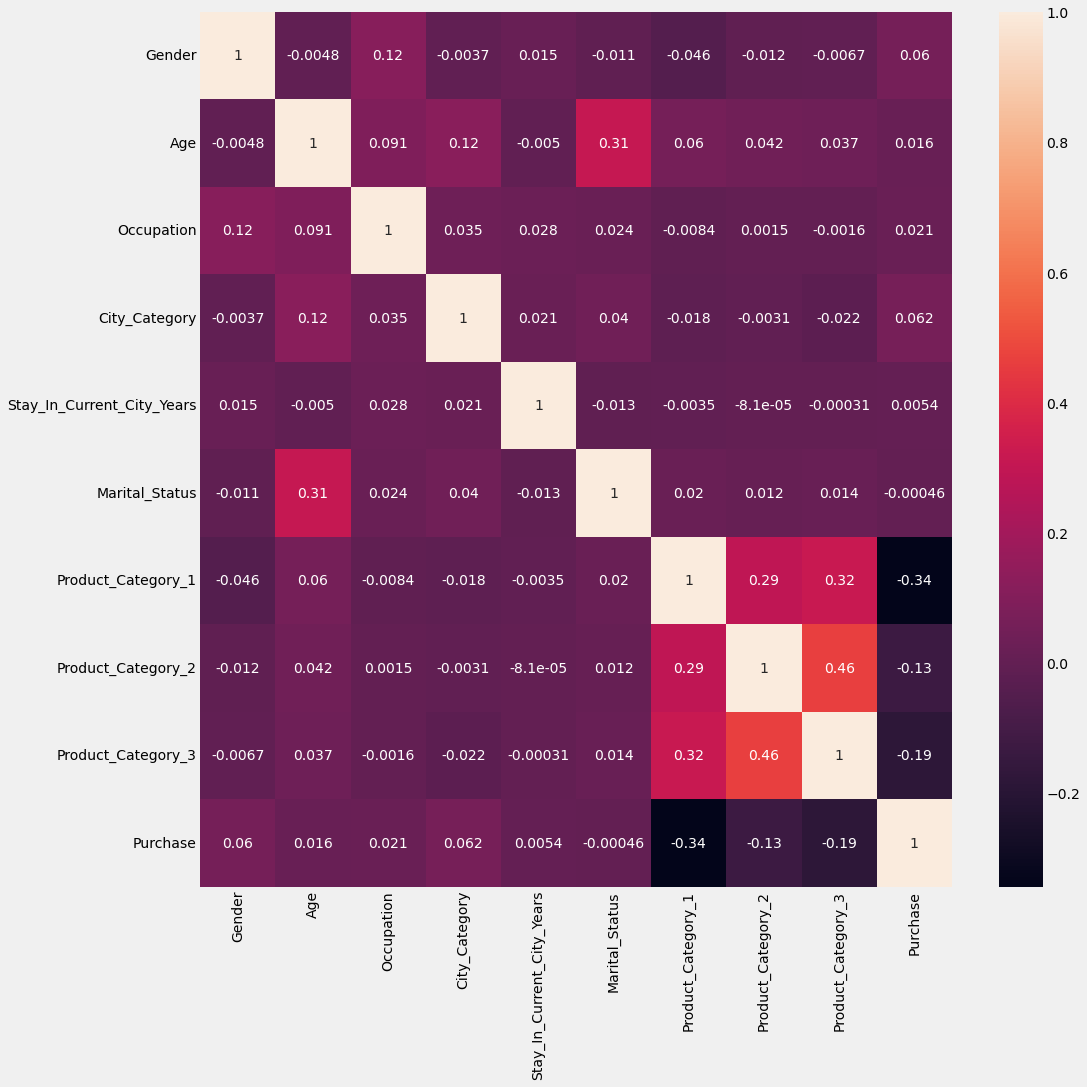

In [313]:
plt.figure(figsize=(15, 15))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True)

In [314]:
df_test

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,5,7,2,2,1,1,11,16,NaN
1,1,3,17,3,0,0,3,5,16,NaN
2,0,4,1,2,4,1,5,14,16,NaN
3,0,4,1,2,4,1,4,9,16,NaN
4,0,3,1,3,1,0,4,5,12,NaN
...,...,...,...,...,...,...,...,...,...,...
233594,0,3,15,2,4,1,8,8,16,NaN
233595,0,3,15,2,4,1,5,8,16,NaN
233596,0,3,15,2,4,1,1,5,12,NaN
233597,0,5,1,3,4,0,10,16,16,NaN


In [315]:
df_train.to_csv("train_cleaned.csv", encoding='utf-8')
df_test.to_csv("test_cleaned.csv", encoding='utf-8')

## EDA and Feature Engineering By Muhammad Hanan Asghar